In [113]:
# ! pip install tensorflow

In [ ]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGeneratorA
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import matplotlib as plt

In [115]:
count = 0 
dirs = os.listdir('./home-appliances')
for dir in dirs:
    files = list(os.listdir('./home-appliances/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' items')
    count = count + len(files)
print( 'home-appliances Folder has '+ str(count) + ' items')

Air Conditioners Folder has 197 items
Blenders Folder has 222 items
Coffee Makers Folder has 224 items
Electric Fans Folder has 212 items
Kitchen Stoves Folder has 212 items
Microwaves Folder has 200 items
Refrigerators Folder has 174 items
Rice Cookers Folder has 209 items
Televisions Folder has 137 items
Toasters Folder has 213 items
Vacuum Cleaners Folder has 218 items
Washing Machines Folder has 218 items
Water Coolers Folder has 192 items
home-appliances Folder has 2628 items


In [116]:
base_dir = 'home-appliances/'
val_dir = './Sample/'
img_size = 180
batch = 32

In [117]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.8,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 2628 files belonging to 13 classes.
Using 2103 files for training.
Found 2628 files belonging to 13 classes.
Using 2102 files for validation.


In [ ]:
home_appliances_names = train_ds.class_names
home_appliances_names

['Air Conditioners',
 'Blenders',
 'Coffee Makers',
 'Electric Fans',
 'Kitchen Stoves',
 'Microwaves',
 'Refrigerators',
 'Rice Cookers',
 'Televisions',
 'Toasters',
 'Vacuum Cleaners',
 'Washing Machines',
 'Water Coolers']

In [119]:
import matplotlib.pyplot as plt

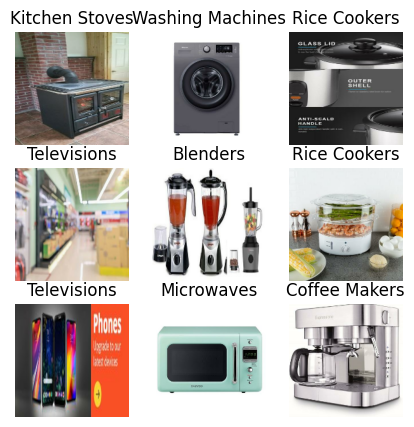

In [120]:
i = 0
plt.figure(figsize=(5,5))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(home_appliances_names[labels[i]])
        plt.axis('off')

In [121]:
AUTOTUNE = tf.data.AUTOTUNE

In [122]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [123]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [124]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

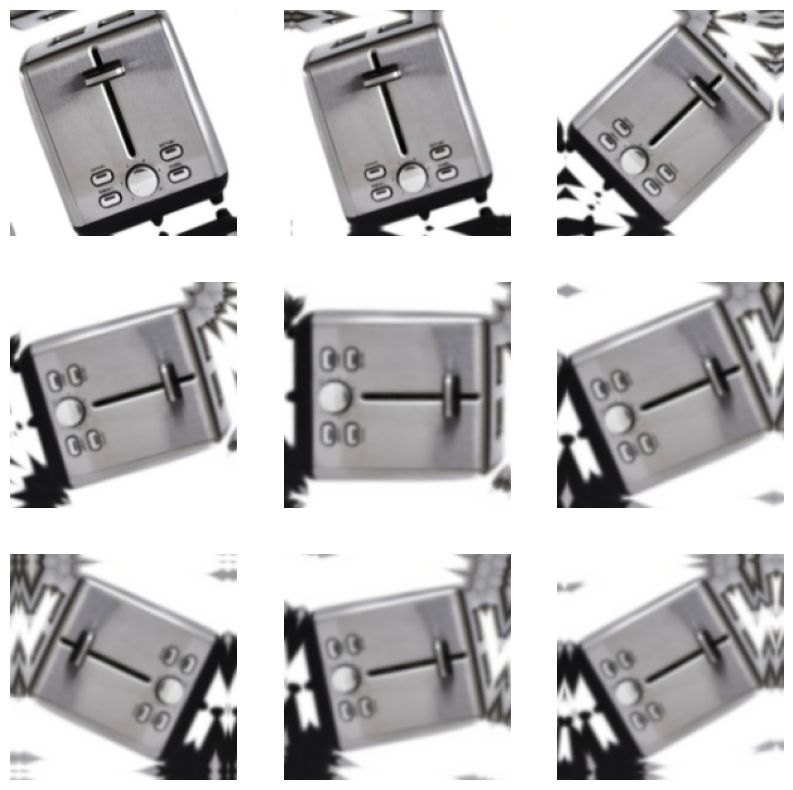

In [125]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [126]:

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(home_appliances_names))
])

In [127]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [128]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 13)             │         1,677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,990,317 (15.22 MB)

 Trainable params: 3,990,317 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [129]:
history = model.fit(train_ds, epochs=25, validation_data=val_ds)

Epoch 1/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 239ms/step - accuracy: 0.0809 - loss: 2.6578 - val_accuracy: 0.1827 - val_loss: 2.4468
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 212ms/step - accuracy: 0.1842 - loss: 2.4089 - val_accuracy: 0.2655 - val_loss: 2.2214
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - accuracy: 0.2752 - loss: 2.1992 - val_accuracy: 0.3449 - val_loss: 2.0321
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - accuracy: 0.3363 - loss: 2.0137 - val_accuracy: 0.3535 - val_loss: 1.9574
Epoch 5/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 194ms/step - accuracy: 0.3814 - loss: 1.9290 - val_accuracy: 0.4301 - val_loss: 1.7810
Epoch 6/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - accuracy: 0.4057 - loss: 1.8241 - val_accuracy: 0.4467 - val_loss: 1.6983
Epoch 7/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - accuracy: 0.4548 - loss: 1.7172 - val_accuracy: 0.5147 - val_loss: 1.5391
Epoch 8/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - accuracy: 0.4924 - loss: 1.5815 - val_accu

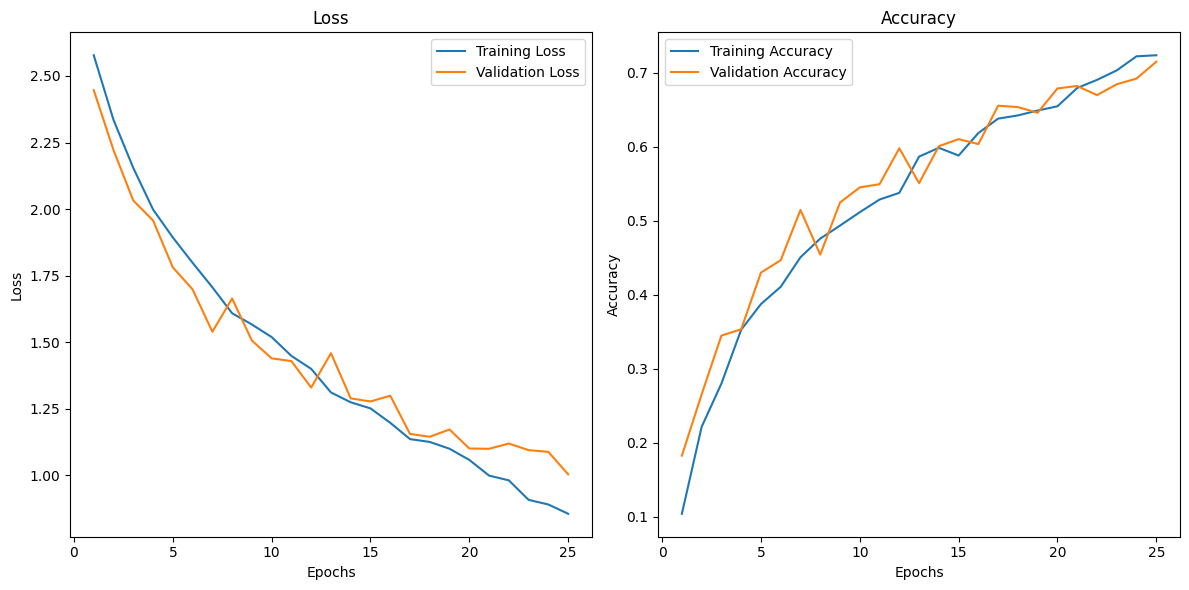

In [130]:
# Plotting loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [158]:
raw_train_ds = tf.keras.utils.image_dataset_from_directory(base_dir)
print(raw_train_ds.class_names)


Found 2628 files belonging to 13 classes.
['Air Conditioners', 'Blenders', 'Coffee Makers', 'Electric Fans', 'Kitchen Stoves', 'Microwaves', 'Refrigerators', 'Rice Cookers', 'Televisions', 'Toasters', 'Vacuum Cleaners', 'Washing Machines', 'Water Coolers']


Found 2628 files belonging to 13 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━

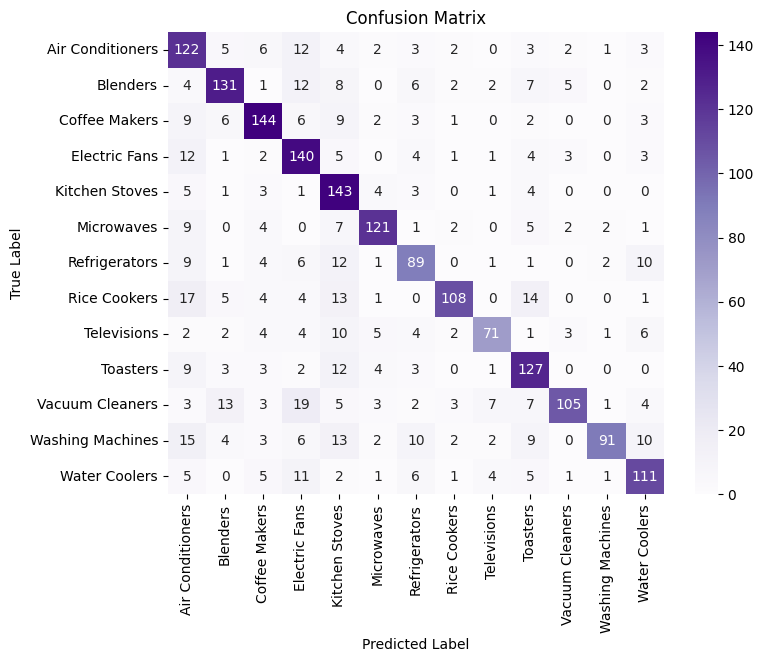

                  precision    recall  f1-score   support

Air Conditioners       0.55      0.74      0.63       165
        Blenders       0.76      0.73      0.74       180
   Coffee Makers       0.77      0.78      0.78       185
   Electric Fans       0.63      0.80      0.70       176
  Kitchen Stoves       0.59      0.87      0.70       165
      Microwaves       0.83      0.79      0.81       154
   Refrigerators       0.66      0.65      0.66       136
    Rice Cookers       0.87      0.65      0.74       167
     Televisions       0.79      0.62      0.69       115
        Toasters       0.67      0.77      0.72       164
 Vacuum Cleaners       0.87      0.60      0.71       175
Washing Machines       0.92      0.54      0.68       167
   Water Coolers       0.72      0.73      0.72       153

        accuracy                           0.72      2102
       macro avg       0.74      0.71      0.71      2102
    weighted avg       0.74      0.72      0.72      2102



In [163]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Retrieve class names before prefetching
raw_train_ds = tf.keras.utils.image_dataset_from_directory(
    "home-appliances",  # Make sure this is the correct path
    seed=123,
    batch_size=32,
    image_size=(180, 180)
)

class_names = raw_train_ds.class_names  # Get class names

# Get predictions on validation dataset
y_true = []
y_pred = []

for images, labels in val_ds:  # Loop through validation dataset
    preds = model.predict(images)  # Get predictions
    y_pred.extend(np.argmax(preds, axis=1))  # Convert softmax output to class indices
    y_true.extend(labels.numpy())  # Convert tensor labels to numpy

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))


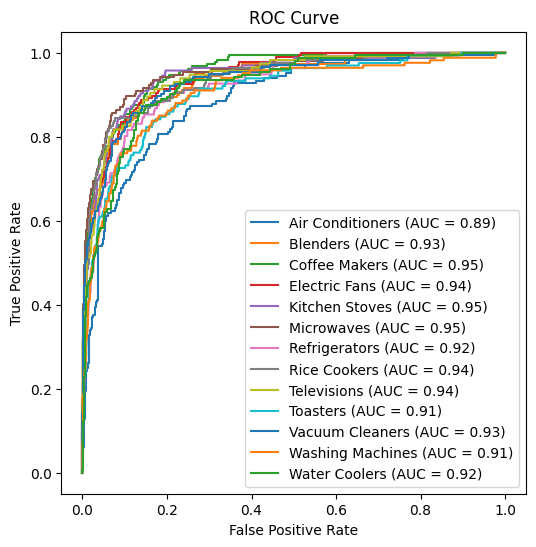

In [165]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(6, 6))

for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_flat == i, y_probs[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {auc_score:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


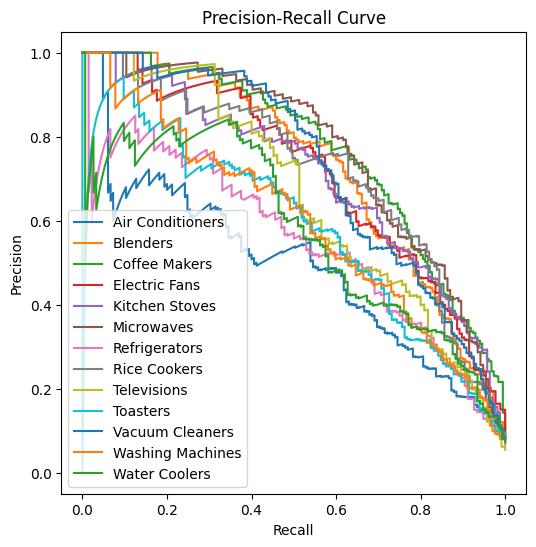

In [168]:
from sklearn.metrics import precision_recall_curve

y_probs = model.predict(val_ds)  # Get probabilities
y_true_flat = np.concatenate([y.numpy() for x, y in val_ds])  # Flatten labels

plt.figure(figsize=(6, 6))

for i in range(len(class_names)):  
    precision, recall, _ = precision_recall_curve(y_true_flat == i, y_probs[:, i])
    plt.plot(recall, precision, label=class_names[i])

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [131]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + home_appliances_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


(np.float64(-0.5), np.float64(893.5), np.float64(760.5), np.float64(-0.5))

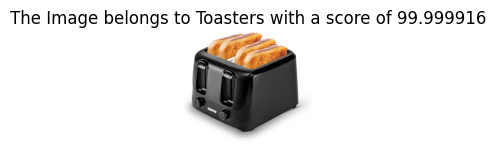

In [132]:
imgPath = './toaster.jpg'
prediction = classify_images(imgPath)
import matplotlib.image as mpimg
plt.subplot(3,3,3)
plt.imshow(mpimg.imread(imgPath))
plt.title(prediction)
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


(np.float64(-0.5), np.float64(1199.5), np.float64(799.5), np.float64(-0.5))

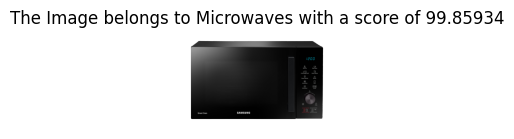

In [133]:
imgPath = './micro.png'
prediction = classify_images(imgPath)
import matplotlib.image as mpimg
plt.subplot(3,3,3)
plt.imshow(mpimg.imread(imgPath))
plt.title(prediction)
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(np.float64(-0.5), np.float64(719.5), np.float64(719.5), np.float64(-0.5))

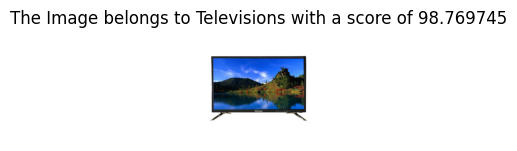

In [134]:
imgPath = './tv.jpg'
prediction = classify_images(imgPath)
import matplotlib.image as mpimg
plt.subplot(3,3,3)
plt.imshow(mpimg.imread(imgPath))
plt.title(prediction)
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


(np.float64(-0.5), np.float64(2999.5), np.float64(2999.5), np.float64(-0.5))

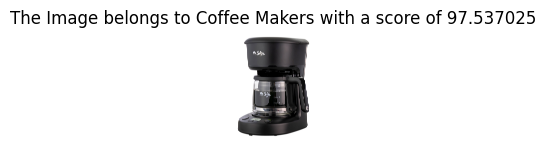

In [135]:
imgPath = './coffee.jpg'
prediction = classify_images(imgPath)
import matplotlib.image as mpimg
plt.subplot(3,3,3)
plt.imshow(mpimg.imread(imgPath))
plt.title(prediction)
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

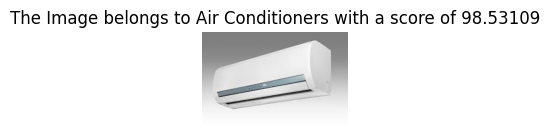

In [136]:
imgPath = './air.jpeg'
prediction = classify_images(imgPath)
import matplotlib.image as mpimg
plt.subplot(3,3,3)
plt.imshow(mpimg.imread(imgPath))
plt.title(prediction)
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


(np.float64(-0.5), np.float64(1599.5), np.float64(1599.5), np.float64(-0.5))

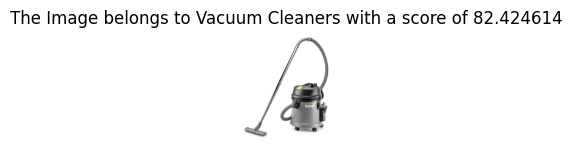

In [146]:
imgPath = './vaccum.jpg'
prediction = classify_images(imgPath)
import matplotlib.image as mpimg
plt.subplot(3,3,3)
plt.imshow(mpimg.imread(imgPath))
plt.title(prediction)
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


(np.float64(-0.5), np.float64(1799.5), np.float64(1014.5), np.float64(-0.5))

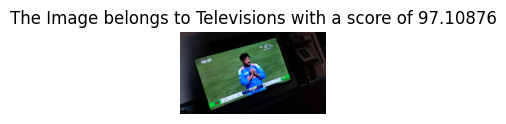

In [138]:
imgPath = './tv2.jpg'
prediction = classify_images(imgPath)
import matplotlib.image as mpimg
plt.subplot(3,3,3)
plt.imshow(mpimg.imread(imgPath))
plt.title(prediction)
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


(np.float64(-0.5), np.float64(1321.5), np.float64(1499.5), np.float64(-0.5))

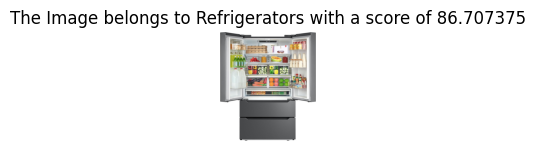

In [139]:
imgPath = './refri.jpg'
prediction = classify_images(imgPath)
import matplotlib.image as mpimg
plt.subplot(3,3,3)
plt.imshow(mpimg.imread(imgPath))
plt.title(prediction)
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

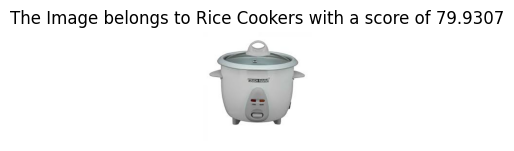

In [140]:
imgPath = './cooker.jpeg'
prediction = classify_images(imgPath)
import matplotlib.image as mpimg
plt.subplot(3,3,3)
plt.imshow(mpimg.imread(imgPath))
plt.title(prediction)
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


(np.float64(-0.5), np.float64(1199.5), np.float64(1199.5), np.float64(-0.5))

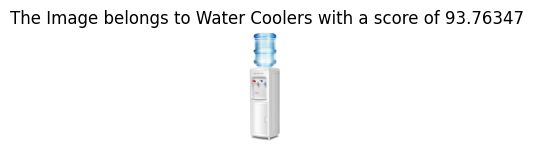

In [141]:
imgPath = './water.jpg'
prediction = classify_images(imgPath)
import matplotlib.image as mpimg
plt.subplot(3,3,3)
plt.imshow(mpimg.imread(imgPath))
plt.title(prediction)
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

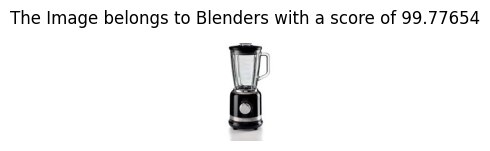

In [147]:
imgPath = './blender.jpeg'
prediction = classify_images(imgPath)
import matplotlib.image as mpimg
plt.subplot(3,3,3)
plt.imshow(mpimg.imread(imgPath))
plt.title(prediction)
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

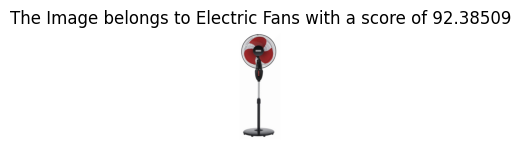

In [145]:
imgPath = './fan.png'
prediction = classify_images(imgPath)
import matplotlib.image as mpimg
plt.subplot(3,3,3)
plt.imshow(mpimg.imread(imgPath))
plt.title(prediction)
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

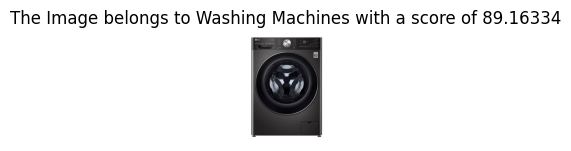

In [151]:
imgPath = './washing.jpg'
prediction = classify_images(imgPath)
import matplotlib.image as mpimg
plt.subplot(3,3,3)
plt.imshow(mpimg.imread(imgPath))
plt.title(prediction)
plt.axis('off')

In [1]:
def predict_appliances(img):
    # Resize and preprocess the image
    img = img.resize((180, 180))  # Match model input size
    img_array = np.array(img) / 255.0  # Normalize (assuming model was trained with normalized images)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Get predictions
    predictions = model.predict(img_array)

    # Debugging: Print the raw predictions
    print("\nRaw Model Output:", predictions)

    # Get the highest probability class
    predicted_class_index = np.argmax(predictions[0])  
    predicted_class = home_appliance_name[predicted_class_index]

    return f"Predicted Appliance: {predicted_class}"


In [ ]:
import gradio as gr
def predict_appliances(img):
    # Resize and preprocess the image
    img = img.resize((180, 180))  # Match model input size
    img_array = np.array(img) / 255.0  # Normalize (assuming model was trained with normalized images)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Get predictions
    predictions = model.predict(img_array)

    # Debugging: Print the raw predictions
    print("\nRaw Model Output:", predictions)

    # Get the highest probability class
    predicted_class_index = np.argmax(predictions[0])  
    predicted_class = home_appliance_name[predicted_class_index]

    return f"Predicted Appliance: {predicted_class}"


c:\Users\Acer\Desktop\pythonclass\home_appliances\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Create Gradio interface
interface = gr.Interface(
    fn=predict_appliances,
    inputs=gr.Image(type="pil"),  # Accepts image input
    outputs="text",
    title="Home Appliance Image Classifier",
    description="Upload an image to classify it into one of the appliance categories.",
    allow_flagging="never"  # Disables the Flag button
)

c:\Users\Acer\Desktop\pythonclass\home_appliances\.venv\lib\site-packages\gradio\interface.py:403: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


In [6]:

# Launch the web app
interface.launch()

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----

To create a public link, set `share=True` in `launch()`.


In [ ]:
model.save('my_model.keras')